<a href="https://colab.research.google.com/github/dancansikuku94/Wheat-Disease-Detection/blob/develop/wheat_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
!pip install split-folders


In [ ]:
input_dir='/content/drive/MyDrive/WHEATDETECTION/train'
output='/content/drive/MyDrive/WHEATDETECTION/processed'

import splitfolders
splitfolders.ratio(input_dir, output, seed=42, ratio=(.8, 0.2)) 

Copying files: 876 files [15:16,  1.05s/ files]


In [ ]:
train_path='/content/drive/MyDrive/WHEATDETECTION/processed/train'
test_path='/content/drive/MyDrive/WHEATDETECTION/processed/val'

In [4]:
pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 7.5 MB/s 
     |████████████████████████████████| 6.3 MB 43.5 MB/s 
     |████████████████████████████████| 1.1 MB 55.8 MB/s 
     |████████████████████████████████| 636 kB 52.8 MB/s 
     |████████████████████████████████| 87 kB 7.7 MB/s 
     |████████████████████████████████| 211 kB 51.5 MB/s 
     |████████████████████████████████| 64 kB 4.1 MB/s 
     |████████████████████████████████| 840 kB 58.6 MB/s 
     |████████████████████████████████| 120 kB 72.7 MB/s 
     |████████████████████████████████| 103 kB 74.0 MB/s 
     |████████████████████████████████| 1.2 MB 47.0 MB/s 
     |████████████████████████████████| 679 kB 49.6 MB/s 
     |████████████████████████████████| 37.1 MB 49 kB/s 
     |████████████████████████████████| 352 kB 49.3 MB/s 
     |████████████████████████████████| 99 kB 11.0 MB/s 
     |████████████████████████████████| 200 kB 71.6 MB/s 


In [5]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [6]:
image_path='/content/drive/MyDrive/WHEATDETECTION/wheatfolder'
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.8)

INFO:tensorflow:Load image with size: 876, num_label: 4, labels: .ipynb_checkpoints, healthy_wheat, leaf_rust, stem_rust.


In [ ]:
#customize the tensorflow model
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
21/21 [==============================] - 260s 12s/step - loss: 1.1256 - accuracy: 0.5179
Epoch 2/5
21/21 [==============================] - 148s 7s/step - loss: 0.8045 - accuracy: 0.7634
Epoch 3/5
21/21 [==============================] - 144s 7s/step - loss: 0.7287 - accuracy: 0.8036
Epoch 4/5
21/21 [==============================] - 142s 7s/step - loss: 0.6818 - accuracy: 0.8363
Epoch 5/5
21/21 [==============================] - 143s 7s/step - loss: 0.6672 - accuracy: 0.8408


In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(test_data)

6/6 [==============================] - 90s 10s/step - loss: 0.7325 - accuracy: 0.7898


In [ ]:
#Export to tensorflow lite model
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpq2_3a80q/assets


INFO:tensorflow:Assets written to: /tmp/tmpq2_3a80q/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpxk940v0q/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpxk940v0q/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [7]:
#on device application
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 876, num_label: 4, labels: .ipynb_checkpoints, healthy_wheat, leaf_rust, stem_rust.


In [8]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

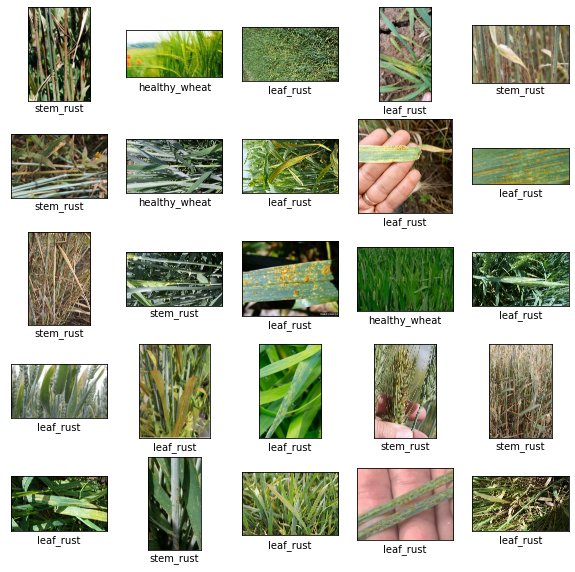

In [9]:
#plotting the first 25 images in each class
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [10]:
#customize the tensorflow model
model = image_classifier.create(train_data, validation_data=validation_data, epochs=20)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
21/21 [==============================] - 430s 21s/step - loss: 1.0856 - accuracy: 0.5417 - val_loss: 0.9304 - val_accuracy: 0.7031
Epoch 2/20
21/21 [==============================] - 175s 9s/step - loss: 0.8375 - accuracy: 0.7574 - val_loss: 0.7629 - val_accuracy: 0.7969
Epoch 3/20
21/21 [==============================] - 183s 9s/step - loss: 0.7071 - accuracy: 0.8199 - val_loss: 0.7260 - val_accuracy: 0.8125
Epoch 4/20
21/21 [==============================] - 169s 8s/step - loss: 0.6813 - accuracy: 0.8482 - val_loss: 0.7272 - val_accuracy: 0.8125
Epoch 5/20
21/21 [==============================] - 163s 8s/step - loss: 0.6579 - accuracy: 0.8467 - val_loss: 0.7111 - val_accuracy: 0.7969
Epoch 6/20
21/21 [==============================] - 160s 8s/step - loss: 0.6528 - accuracy: 0.8631 - val_loss: 0.7038 - val_accuracy: 0.7969
Epoch 7/20
21/21 [==============================] - 175s 9s/step - loss: 0.6395 - accuracy: 0.8690 - val_loss: 0.6805 - val_accuracy: 0.8281
Epoch 8/20
2

In [11]:
#model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________


In [12]:
#Evaluate the created model
loss, accuracy=model.evaluate(test_data)

3/3 [==============================] - 85s 15s/step - loss: 0.8649 - accuracy: 0.7955


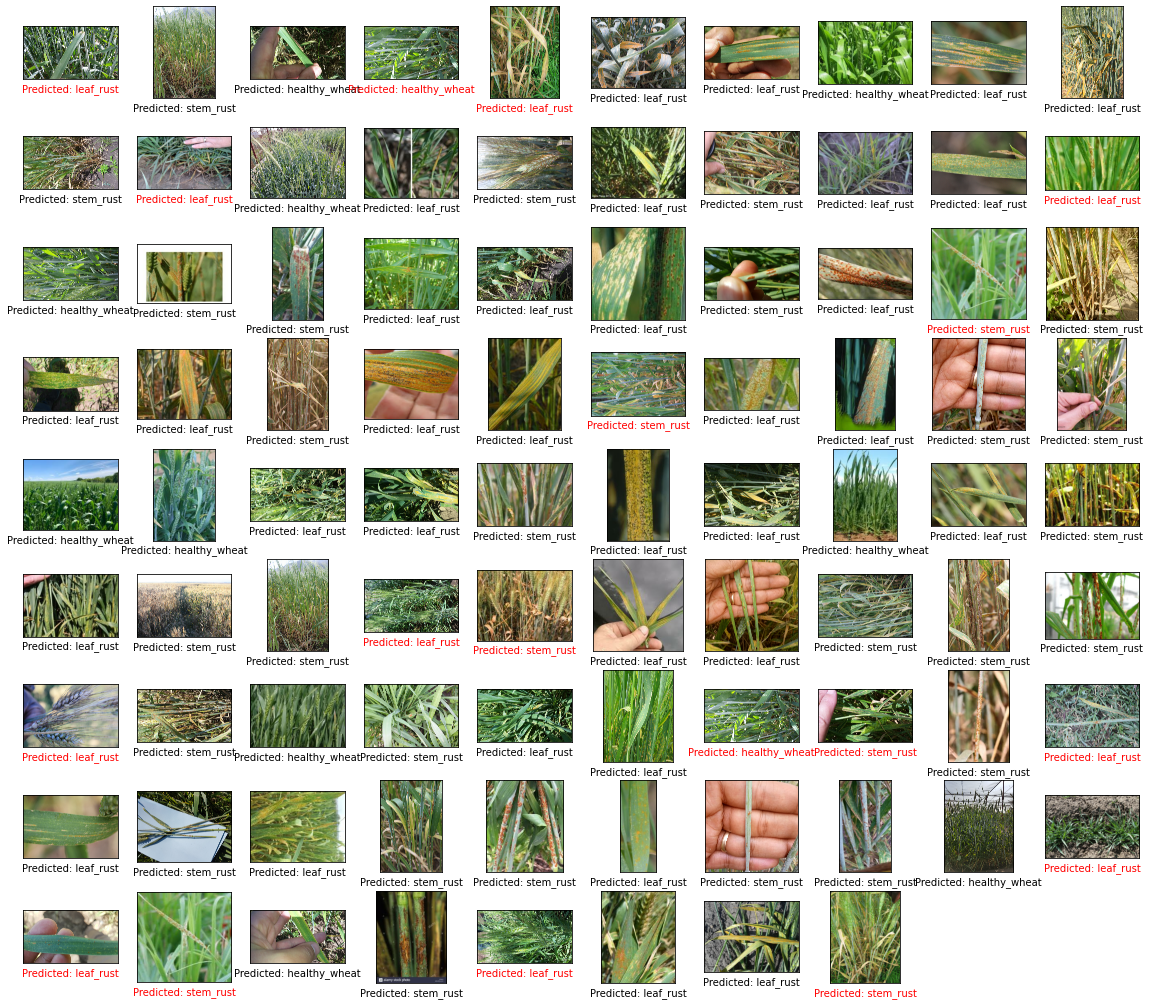

In [13]:
#prediction for 100 test images ,red incorrectly predicted
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [14]:
#export to tensorflow lite model
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpi5i72ffy/assets


INFO:tensorflow:Assets written to: /tmp/tmpi5i72ffy/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp9pgjvbac/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp9pgjvbac/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [15]:
#export labels
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [16]:
#Evaluating tflite model
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.7954545454545454}